### Loan Default Prediction: A Machine Learning Approach
##### The goal of this project is to determine the likelihood of loan approval for an applicant.
The dataset used in this project is synthetically generated and is part of the Kaggle Playground Series. It does not represent real-world data and is intended solely for educational and research purposes.
For more information, please visit https://tinyurl.com/bddx28a5


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000) 


### First Looks

In [2]:
def view(df: pd.DataFrame,nsummary=False,dtypesummary=False):
    print('A visual display of the dataset')
    # print(tabulate(df.head(),headers=df.columns,tablefmt='pretty'))
    display(df.head())
    if nsummary:
        print('\nA Numeric Summary of the dataset')
        # print(tabulate(df.describe(),headers=df.describe().columns ,tablefmt='pretty',floatfmt='.2f'))
        display(df.describe())
    if dtypesummary:
        display(df.info())
      
   


In [3]:
# loading the dataset
df = pd.read_csv('./credit_risk_dataset.csv')
view(df,nsummary=True,dtypesummary=True)



A visual display of the dataset


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4



A Numeric Summary of the dataset


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

### Understanding the Data

<Axes: >

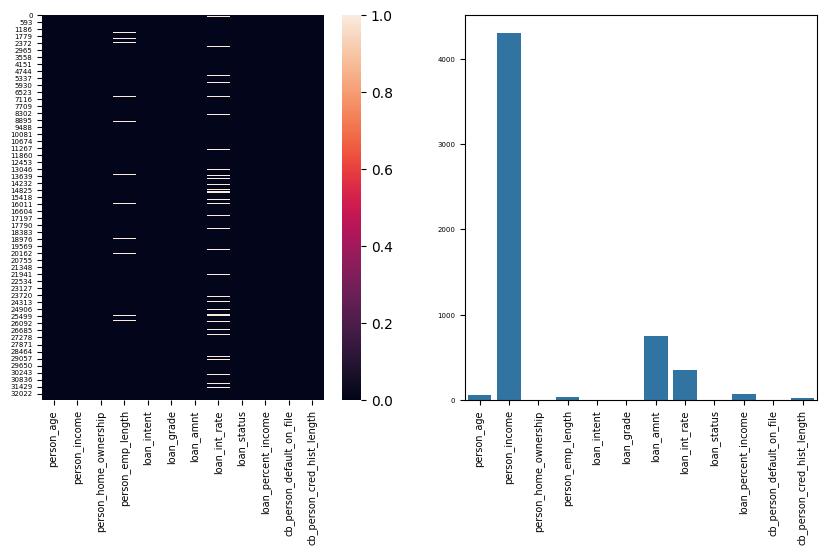

In [4]:
#basic plots
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)  
plt.xticks(fontsize=7)  
plt.yticks(fontsize=5)
sns.heatmap(df.isnull())

plt.subplot(1,2,2)
plt.xticks(fontsize=7,rotation=90)  
plt.yticks(fontsize=5)
sns.barplot(df.nunique())




* loan_int_rate has the highest number of missing values:

    This could indicate incomplete data or cases where the interest rate was not applicable.
    Missing values may affect financial analysis or decision-making processes.
    person_income has the highest deviation:

* This suggests significant variation in income levels across individuals.
    A large deviation could reflect diverse socioeconomic backgrounds, impacting credit assessments and financial analysis.





Text(0, 0.5, '')

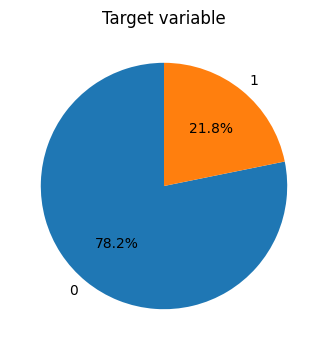

In [13]:
plt.figure(figsize=(4,4))
plt.title('Target variable')
df.loan_status.value_counts().plot.pie( autopct='%1.1f%%', startangle=90, )
plt.ylabel('')

dataset is imbalanced


In [16]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].dtype == 'object':
        categorical_features.append(i)
    else:
        numerical_features.append(i)

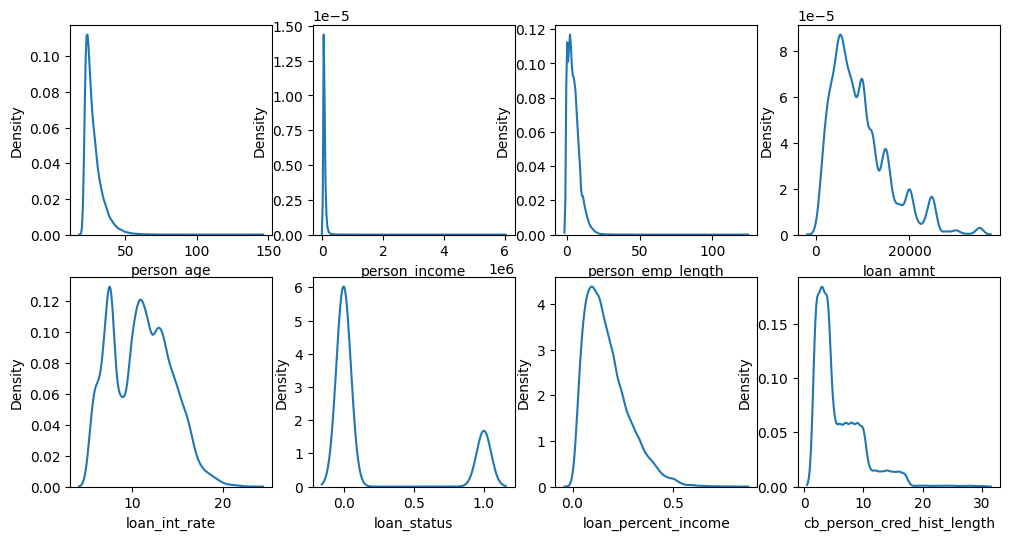

In [27]:
plt.figure(figsize=(12,6))
for index,value in enumerate(numerical_features):
    plt.subplot(2,4,index+1)
    sns.kdeplot(df[value],)


Categorical plots with loan_status

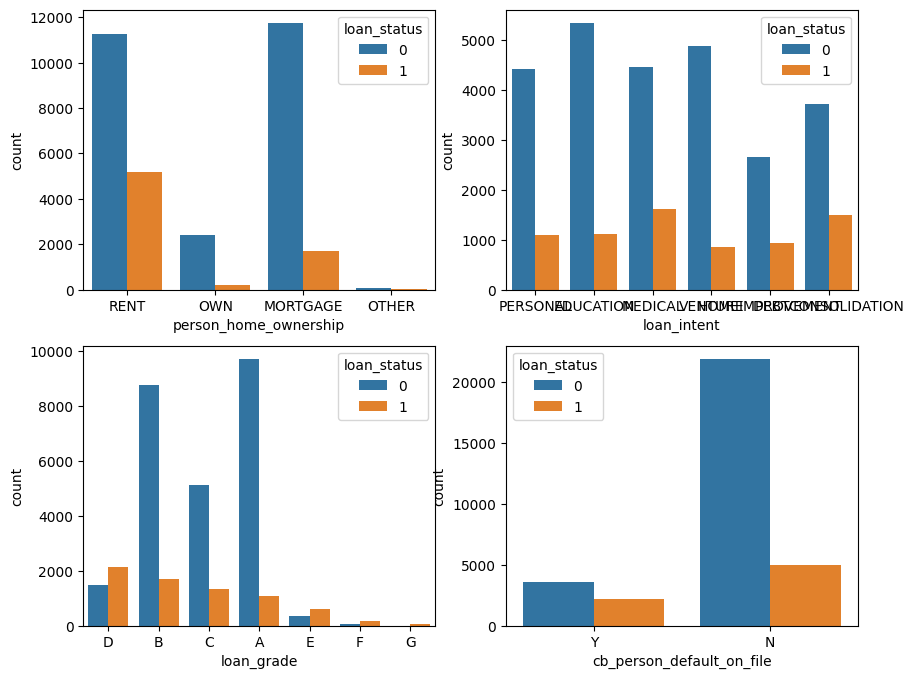

In [40]:
plt.figure(figsize=(10,8))
for index,value in enumerate(categorical_features):
    plt.subplot(2,2,index+1)
    sns.countplot(df,x=value,hue=df.loan_status)